In [57]:
from copy import deepcopy
from random import shuffle

import numpy as np
from scipy.stats import entropy

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 14})
matplotlib.rc('axes', titlesize=16)

from infomercial.util import Distribution
from infomercial.discrete.value import information_value
from infomercial.discrete.value import entropy
from infomercial.discrete.value import mutual_information
from infomercial.discrete.value import kl_divergence
from infomercial.discrete.value import estimate_prob
from infomercial.discrete.value import delta_p

from infomercial.local_gym import BanditFourArmedDeterministicFixed

# Compare value metrics

In set of simuluted 4-arm bandit discrete distributions

In [58]:
# Sampling fns
def generate_obs(n0, n1, n2, n3):
    X = []
    X.extend([0] * n0)
    X.extend([1] * n1)
    X.extend([2] * n2)
    X.extend([3] * n3)
    shuffle(X)
    
    return X

In [118]:
# Shared params
N = 15 # Num samples
i = 1  # Target arm

## From uniform, to biased.

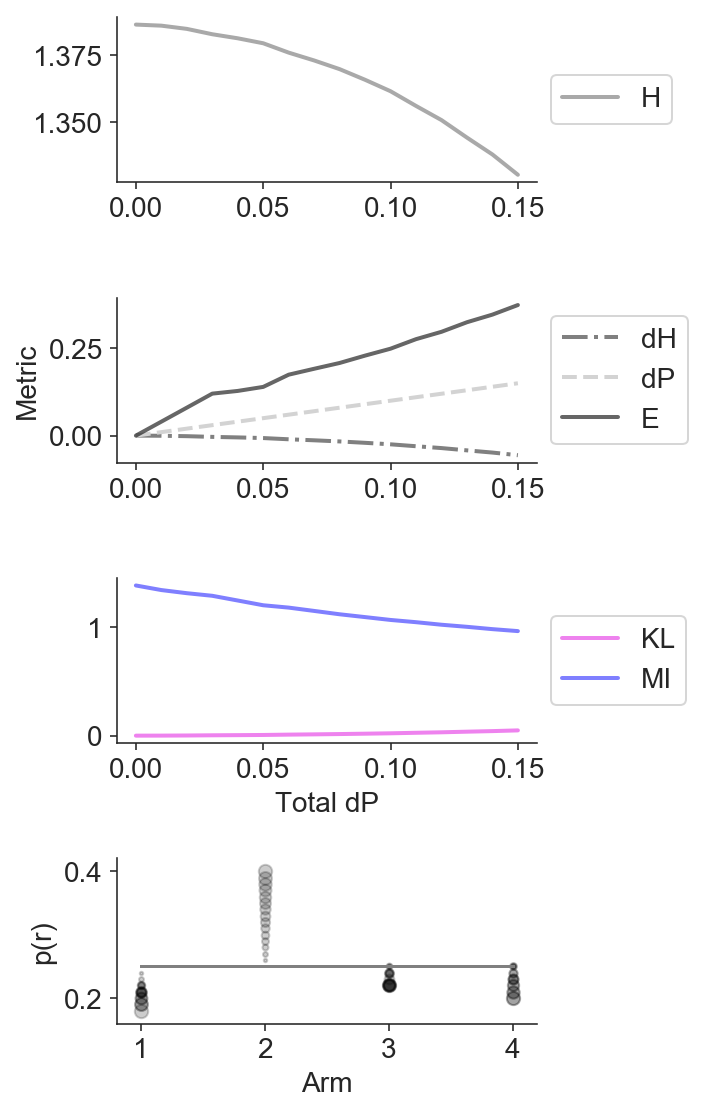

In [169]:
N = 15
X = generate_obs(25, 25, 25, 25)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find an not i
    shuffle(r)
    n = r[0]
    loc = y.index(n)
    
    # Change to i
    y[loc] = i
    
    # Save
    Y.append(deepcopy(y))

# -
H = [entropy(y) for y in Y]
dH = [entropy(y) - entropy(X) for y in Y]
MI = [mutual_information(X, y) for y in Y]
KL = [kl_divergence(X, y) for y in Y]
dP = [delta_p(X, y) for y in Y]
E = [information_value(X, y) for y in Y]

# -
H = [entropy(y) for y in Y]
dH = [entropy(y) - entropy(X) for y in Y]
MI = [mutual_information(X, y) for y in Y]
KL = [kl_divergence(X, y) for y in Y]
dP = [delta_p(X, y) for y in Y]
E = [information_value(X, y) for y in Y]

# -
ps = np.asarray(range(N+1)) / 100
fig, ax = plt.subplots(4, sharex=False, figsize=(5, 8))
ax[0].plot(ps, H, label='H', color="darkgrey", linewidth=2)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].plot(ps, dH, label='dH', color="grey", linestyle='-.', linewidth=2)
ax[1].plot(ps, dP, label='dP', color="lightgrey", linestyle='--', linewidth=2)
ax[1].plot(ps, E, label='E', color="black", alpha=0.6, linewidth=2)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[2].plot(ps, KL, label='KL', color="violet", linewidth=2)
ax[2].plot(ps, MI, label='MI', color="blue", alpha=0.5, linewidth=2)
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].set_ylabel("Metric")
ax[2].set_xlabel("Total dP")

for n, y in enumerate(Y):
    p = estimate_prob(y)[0]
    ax[3].scatter([1, 2, 3, 4], p, s=n*3, color="black", alpha=.2)
    ax[3].plot([1, 2, 3, 4], [0.25]*4, color="grey")
ax[3].set_ylabel("p(r)")
ax[3].set_xlabel("Arm")
             
_ = fig.tight_layout()
_ = sns.despine()

# From biased to uniform

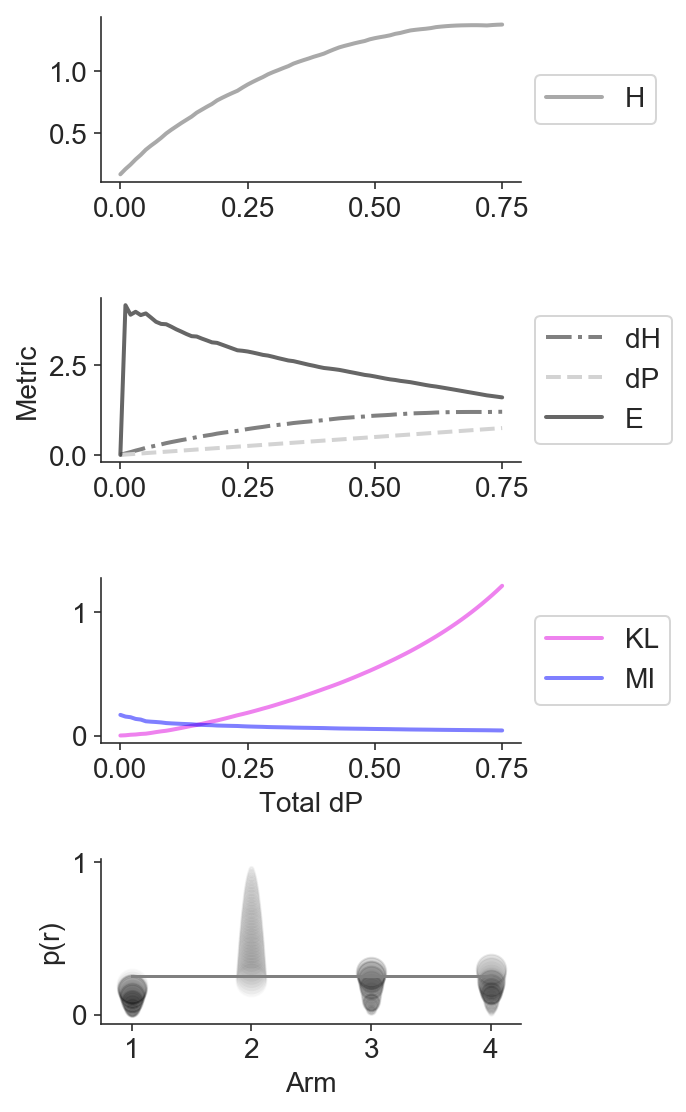

In [165]:
N = 75

X = generate_obs(1, 97, 1, 1)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find i
    loc = y.index(i)
    
    # Pick a not i to replace it
    shuffle(r)
    n = r[0]
    
    # Change to i to not i
    y[loc] = n
    
    # Save
    Y.append(deepcopy(y))

# -
H = [entropy(y) for y in Y]
dH = [entropy(y) - entropy(X) for y in Y]
MI = [mutual_information(X, y) for y in Y]
KL = [kl_divergence(X, y) for y in Y]
dP = [delta_p(X, y) for y in Y]
E = [information_value(X, y) for y in Y]

# -
ps = np.asarray(range(N+1)) / 100
fig, ax = plt.subplots(4, sharex=False, figsize=(5, 8))
ax[0].plot(ps, H, label='H', color="darkgrey", linewidth=2)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].plot(ps, dH, label='dH', color="grey", linestyle='-.', linewidth=2)
ax[1].plot(ps, dP, label='dP', color="lightgrey", linestyle='--', linewidth=2)
ax[1].plot(ps, E, label='E', color="black", alpha=0.6, linewidth=2)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[2].plot(ps, KL, label='KL', color="violet", linewidth=2)
ax[2].plot(ps, MI, label='MI', color="blue", alpha=0.5, linewidth=2)
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].set_ylabel("Metric")
ax[2].set_xlabel("Total dP")

for n, y in enumerate(Y):
    p = estimate_prob(y)[0]
    ax[3].scatter([1, 2, 3, 4], p, s=n*3, color="black", alpha=.02)
    ax[3].plot([1, 2, 3, 4], [0.25]*4, color="grey")
ax[3].set_ylabel("p(r)")
ax[3].set_xlabel("Arm")
             
_ = fig.tight_layout()
_ = sns.despine()

100

# Local correlations

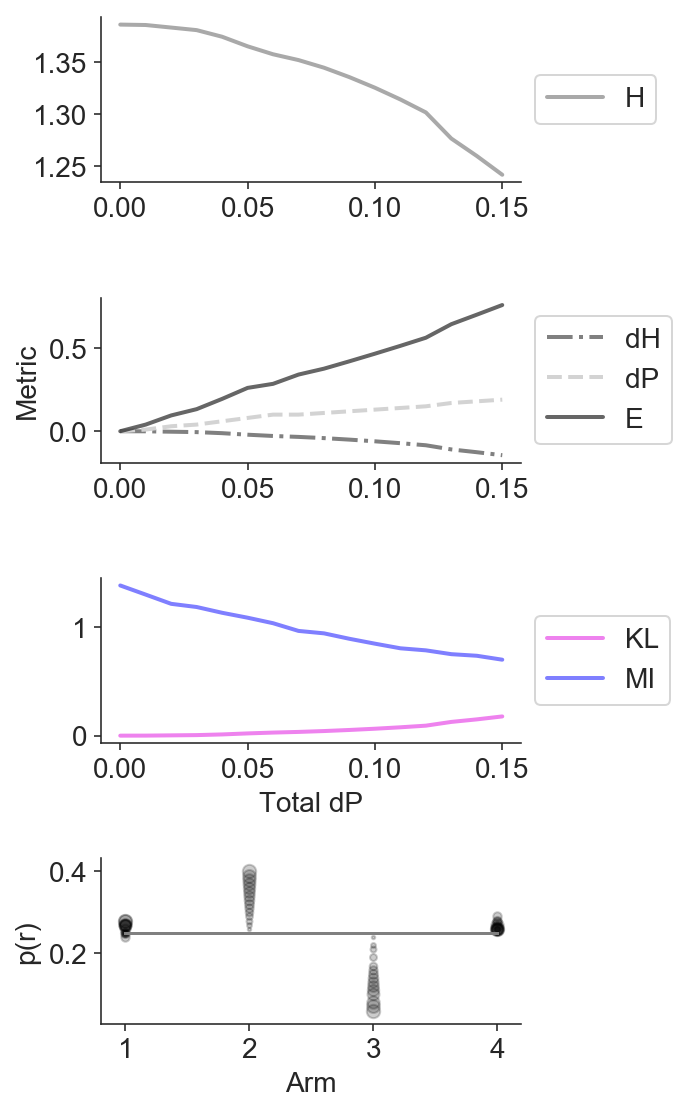

In [171]:
X = generate_obs(25, 25, 25, 25)
Y = [deepcopy(X)]
y = deepcopy(X)

r1 = [0, 2, 3]
r2 = [0, 3]
for _ in range(N):
    # -------------------------
    # Find a not i
    shuffle(r1)
    n = r1[0]
    loc = y.index(n)
    
    # Change to i
    y[loc] = i
    
    # -------------------------
    # Find i + 1
    loc = y.index(i + 1)
    
    # Replace w/ a not i/i+1
    shuffle(r2)
    n = r2[0]
    y[loc] = n
    
    # Save
    Y.append(deepcopy(y))

# -
H = [entropy(y) for y in Y]
dH = [entropy(y) - entropy(X) for y in Y]
MI = [mutual_information(X, y) for y in Y]
KL = [kl_divergence(X, y) for y in Y]
dP = [delta_p(X, y) for y in Y]
E = [information_value(X, y) for y in Y]

# -
ps = np.asarray(range(N+1)) / 100
fig, ax = plt.subplots(4, sharex=False, figsize=(5, 8))
ax[0].plot(ps, H, label='H', color="darkgrey", linewidth=2)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].plot(ps, dH, label='dH', color="grey", linestyle='-.', linewidth=2)
ax[1].plot(ps, dP, label='dP', color="lightgrey", linestyle='--', linewidth=2)
ax[1].plot(ps, E, label='E', color="black", alpha=0.6, linewidth=2)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[2].plot(ps, KL, label='KL', color="violet", linewidth=2)
ax[2].plot(ps, MI, label='MI', color="blue", alpha=0.5, linewidth=2)
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].set_ylabel("Metric")
ax[2].set_xlabel("Total dP")

for n, y in enumerate(Y):
    p = estimate_prob(y)[0]
    ax[3].scatter([1, 2, 3, 4], p, s=n*3, color="black", alpha=.2)
    ax[3].plot([1, 2, 3, 4], [0.25]*4, color="grey")
ax[3].set_ylabel("p(r)")
ax[3].set_xlabel("Arm")
             
_ = fig.tight_layout()
_ = sns.despine()

# Global versus local

## Increasing

Text(0.5,0,'Total dP')

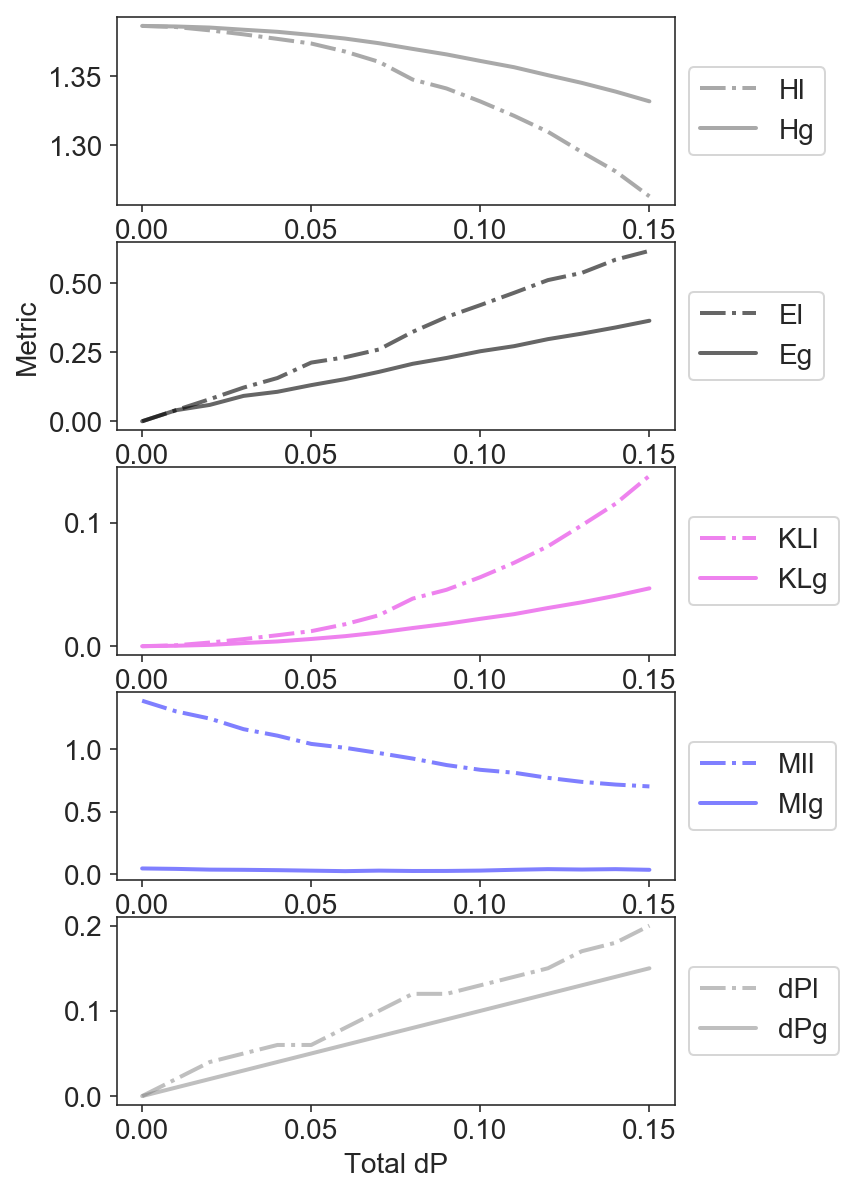

In [172]:
# Global
X = generate_obs(25, 25, 25, 25)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find an not i
    shuffle(r)
    n = r[0]
    loc = y.index(n)
    
    # Change to i
    y[loc] = i
    
    # Save
    Y.append(deepcopy(y))

# Save   
Yg = deepcopy(Y)

# Local
X = generate_obs(25, 25, 25, 25)
Y = [deepcopy(X)]
y = deepcopy(X)

r1 = [0, 2, 3]
r2 = [0, 3]
for _ in range(N):
    # -------------------------
    # Find a not i
    shuffle(r1)
    n = r1[0]
    loc = y.index(n)
    
    # Change to i
    y[loc] = i
    
    # -------------------------
    # Find i + 1
    loc = y.index(i + 1)
    
    # Replace w/ a not i/i+1
    shuffle(r2)
    n = r2[0]
    y[loc] = n
    
    # Save
    Y.append(deepcopy(y))
    
Yl = deepcopy(Y)

# Metrics
Hl = [entropy(y) for y in Yl]
dHl = [entropy(y) - entropy(X) for y in Yl]
MIl = [mutual_information(X, y) for y in Yl]
KLl = [kl_divergence(X, y) for y in Yl]
dPl = [delta_p(X, y) for y in Yl]
El = [information_value(X, y) for y in Yl]

Hg = [entropy(y) for y in Yg]
dHg = [entropy(y) - entropy(X) for y in Yg]
MIg = [mutual_information(X, y) for y in Yg]
KLg = [kl_divergence(X, y) for y in Yg]
dPg = [delta_p(X, y) for y in Yg]
Eg = [information_value(X, y) for y in Yg]

# -------------------------------------
ps = np.asarray(range(N+1)) / 100
fig, ax = plt.subplots(5, sharex=False, figsize=(5, 10))
ax[0].plot(ps, Hl, label='Hl', color="darkgrey", linewidth=2, linestyle='-.')
ax[0].plot(ps, Hg, label='Hg', color="darkgrey", linewidth=2)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].plot(ps, El, label='El', color="black", alpha=0.6, linewidth=2, linestyle='-.')
ax[1].plot(ps, Eg, label='Eg', color="black", alpha=0.6, linewidth=2)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[2].plot(ps, KLl, label='KLl', color="violet", linewidth=2, linestyle='-.')
ax[2].plot(ps, KLg, label='KLg', color="violet", linewidth=2)
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[3].plot(ps, MIl, label='MIl', color="blue", alpha=0.5, linewidth=2, linestyle='-.')
ax[3].plot(ps, MIg, label='MIg', color="blue", alpha=0.5, linewidth=2)
ax[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[4].plot(ps, dPl, label='dPl', color="grey", alpha=0.5, linewidth=2, linestyle='-.')
ax[4].plot(ps, dPg, label='dPg', color="grey", alpha=0.5, linewidth=2)
ax[4].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].set_ylabel("Metric")
ax[4].set_xlabel("Total dP")